In [1]:
# import des modules
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
# Mise en place du pouvoir d'inversion de phase d'Aika sur chacun des grimoires

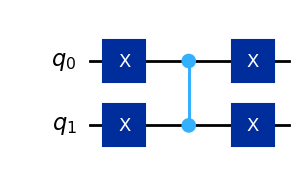

In [3]:
# Oracle appliqué sur le grimoire 0
def oracle_first_grimoire():
    qCircuit = QuantumCircuit(2)
    qCircuit.x(0)
    qCircuit.x(1)
    qCircuit.cz(0,1)
    qCircuit.x(0)
    qCircuit.x(1)
    
    return qCircuit
    
qCircuit = oracle_first_grimoire()
qCircuit.draw(output='mpl', style="iqp")

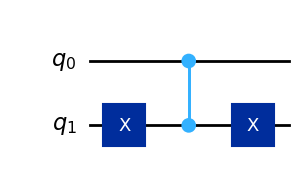

In [4]:
# Oracle appliqué sur le grimoire 1
def oracle_second_grimoire():
    qCircuit = QuantumCircuit(2)
    qCircuit.x(1)
    qCircuit.cz(0,1)
    qCircuit.x(1)
    
    return qCircuit
    
qCircuit = oracle_second_grimoire()
qCircuit.draw(output='mpl', style="iqp")

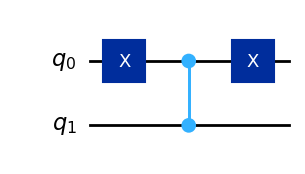

In [5]:
# Oracle appliqué sur le grimoire 2
def oracle_third_grimoire():
    qCircuit = QuantumCircuit(2)
    qCircuit.x(0)
    qCircuit.cz(0,1)
    qCircuit.x(0)
    
    return qCircuit
    
qCircuit = oracle_third_grimoire()
qCircuit.draw(output='mpl', style="iqp")

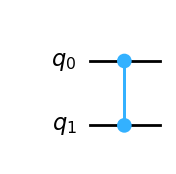

In [6]:
# Oracle appliqué sur le grimoire 3
def oracle_fourth_grimoire():
    qCircuit = QuantumCircuit(2)
    qCircuit.cz(0,1)
    
    return qCircuit
    
qCircuit = oracle_fourth_grimoire()
qCircuit.draw(output='mpl', style="iqp")

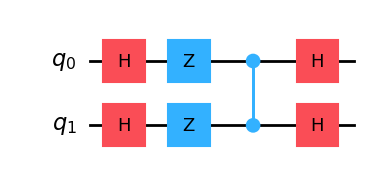

In [7]:
# Création du circuit du diffuseur
def diffuseur_circuit():
    qCircuit = QuantumCircuit(2)
    qCircuit.h(0)
    qCircuit.h(1)
    
    qCircuit.z(0)
    qCircuit.z(1)
    
    qCircuit.cz(0, 1)
    
    qCircuit.h(0)
    qCircuit.h(1)
    
    return qCircuit
    
qCircuit = diffuseur_circuit()
qCircuit.draw(output='mpl', style="iqp")

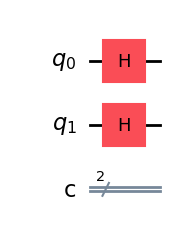

In [8]:
# Fonction du circuit de base
def base_circuit(): 
    qCircuit = QuantumCircuit(2, 2)
    
    qCircuit.h(0)
    qCircuit.h(1)

    return qCircuit

# On vérifie qu'au départ tous les grimoires auront la même probabilité d'être emprunté
qCircuit = base_circuit()
qCircuit.draw(output='mpl', style="iqp")

In [9]:
# Définition de la fonction permettant de tester chacun des grimoires un par un 
def check_grimoire(grimoire_circuit, grimoire_number):
    qCircuit = base_circuit()

    # Ajout du circuit du grimoire choisis, transformé en gate pour la lisibilité
    grimoire_gate = grimoire_circuit.to_gate()
    grimoire_gate.name = "grimoire " + str(grimoire_number)
    qCircuit.append(grimoire_gate, [0, 1])

    # Ajout du diffuseur, transformé en gate pour la lisibilité
    diffuseur_gate = diffuseur_circuit().to_gate()
    diffuseur_gate.name = "diffuseur"
    qCircuit.append(diffuseur_gate, [0, 1])

    qCircuit.measure_all()

    return qCircuit

In [10]:
# Définition de la fonction pour faire les simulations
def simulate(qCircuit):
    simulator = Aer.get_backend('aer_simulator')
    transpilator = transpile(qCircuit, simulator)
    
    return simulator.run(transpilator).result().get_counts()

In [11]:
# Simulation sur chacun des grimoires

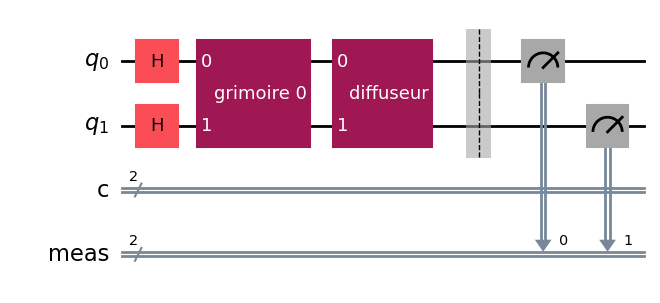

In [12]:
# Grimoire 0
qCircuit = check_grimoire(oracle_first_grimoire(), 0)
qCircuit.draw('mpl', style="iqp")

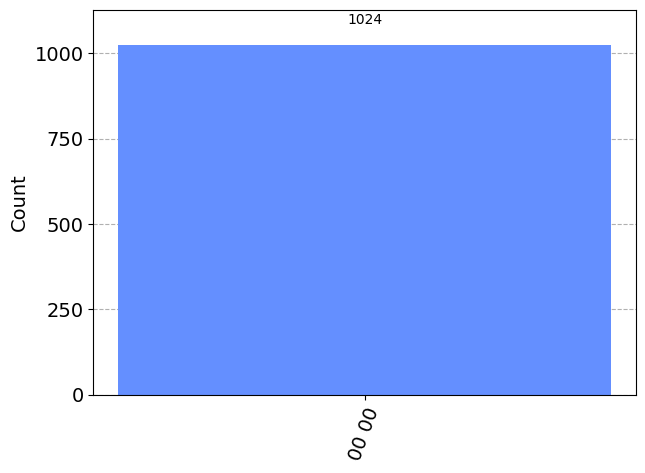

In [13]:
# Simulation
plot_histogram(simulate(qCircuit))

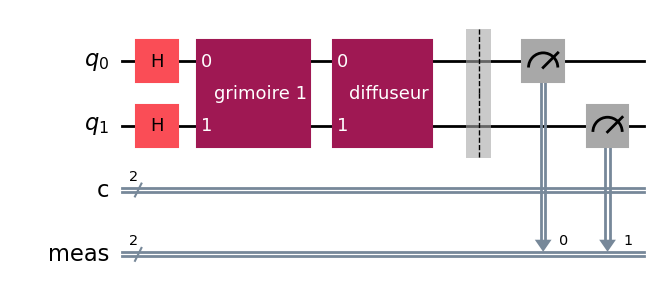

In [14]:
# Grimoire 1
qCircuit = check_grimoire(oracle_second_grimoire(), 1)
qCircuit.draw('mpl', style="iqp")

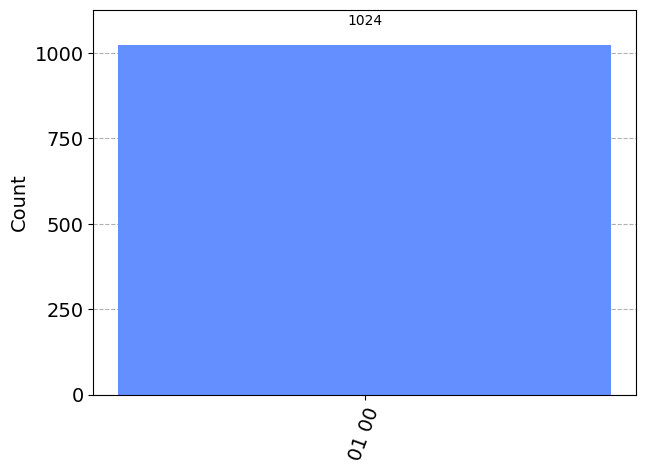

In [15]:
# Simulation
plot_histogram(simulate(qCircuit))

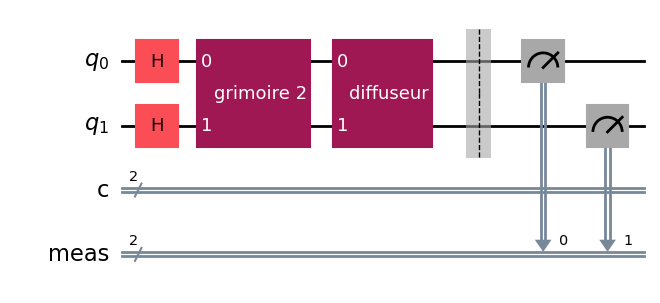

In [16]:
# Grimoire 2
qCircuit = check_grimoire(oracle_third_grimoire(), 2)
qCircuit.draw('mpl', style="iqp")

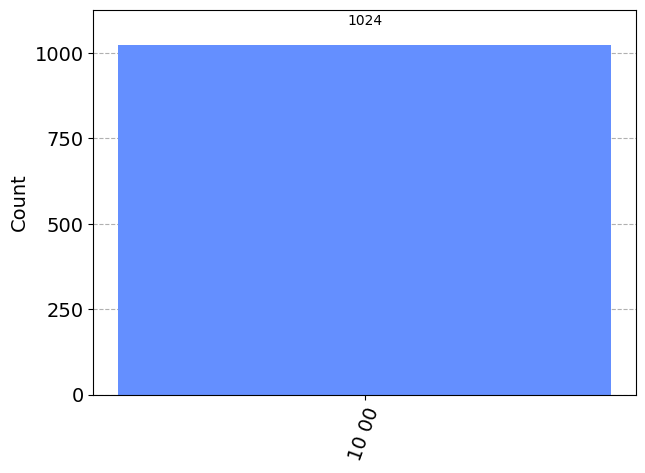

In [17]:
# Simulation
plot_histogram(simulate(qCircuit))

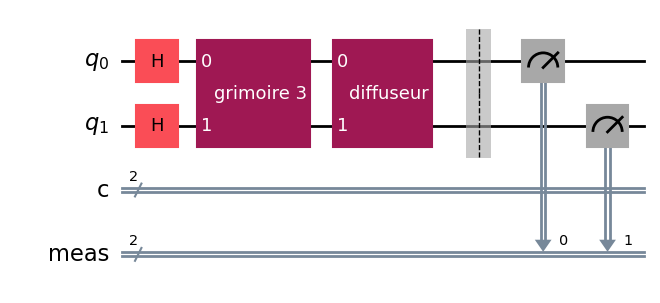

In [18]:
# Grimoire 3
qCircuit = check_grimoire(oracle_fourth_grimoire(), 3)
qCircuit.draw('mpl', style="iqp")

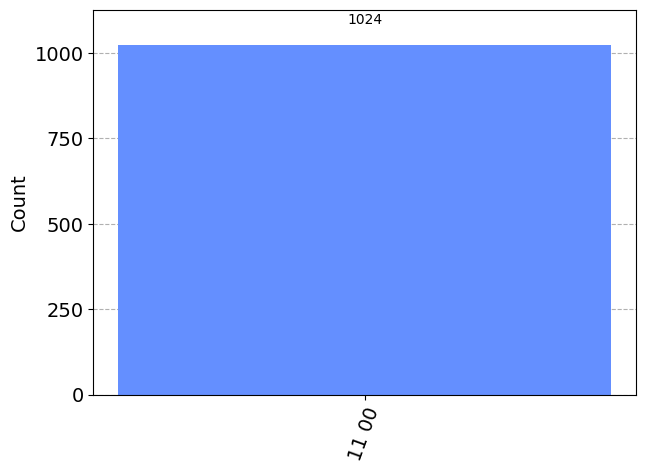

In [19]:
# Simulation
plot_histogram(simulate(qCircuit))

In [ ]:
# On voit donc bien que dans chaque test, le grimoire à choisir est celui qui est ressortis par les simulations